In [1]:
# box plots of median, interquartile range of 
# sucessful and failed campaign goals by category

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
from IPython.display import display
from IPython.core.pylabtools import getfigs
import sklearn.metrics
import seaborn as sns
import pickle
sns.set_style('whitegrid')

In [3]:
%matplotlib qt

In [4]:
from IPython.display import display
from IPython.core.pylabtools import getfigs

In [5]:
saveas_path = '/Users/jamie/insight data/figures/'

In [6]:
X_df = pd.read_pickle('new_X_df.save')

In [7]:
outcomes_df = pd.read_pickle('new_outcomes_df.save')

In [8]:
success_is = np.where(outcomes_df['Outcome'] == 1)[0]
fail_is = np.where(outcomes_df['Outcome'] == 0)[0]

In [9]:
categories = ['art', 'comics', 'crafts', 'dance', 'design',
       'fashion', 'film', 'food', 'games', 'journalism', 'music',
       'photography', 'publishing', 'technology', 'theater']

In [10]:
n_successes = len(success_is)
print n_successes

47620


In [11]:
n_fails = len(fail_is)
print n_fails

67576


In [12]:
successful_goals_by_cat = pd.DataFrame(index=range(n_successes),columns=['Goal','Category'])

In [13]:
start_i = 0
for cat in categories[0:]:
    this_cat_rows_i = np.where(X_df.ix[success_is,cat])[0]
    n_this_cat = len(this_cat_rows_i)
    successful_goals_by_cat.ix[start_i:(start_i+n_this_cat-1),'Goal'] = X_df.ix[this_cat_rows_i,'Goal'].values
    successful_goals_by_cat.ix[start_i:(start_i+n_this_cat-1),'Category'] = cat
    start_i = start_i + n_this_cat

In [14]:
successful_goals_by_cat.tail()

,Goal,Category
47615,10000,theater
47616,500,theater
47617,11111,theater
47618,1200,theater
47619,9800,theater


In [26]:
#sns.palplot(sns.hls_palette(15, l=.3, s=.8))
sns.set_palette(sns.hls_palette(15, l=.3, s=.8))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.boxplot(x='Category',y='Goal',data=successful_goals_by_cat,\
           palette=sns.hls_palette(15, l=.3, s=.8))
ax.set_yscale('log')

In [27]:
plt.title('Goals of sucessful projects')

In [28]:
saveas_path = '/Users/jamie/insight_data/figures/'
plt.savefig(saveas_path + 'Goals of sucessful projects.png',bbox_inches='tight',dpi=400) 

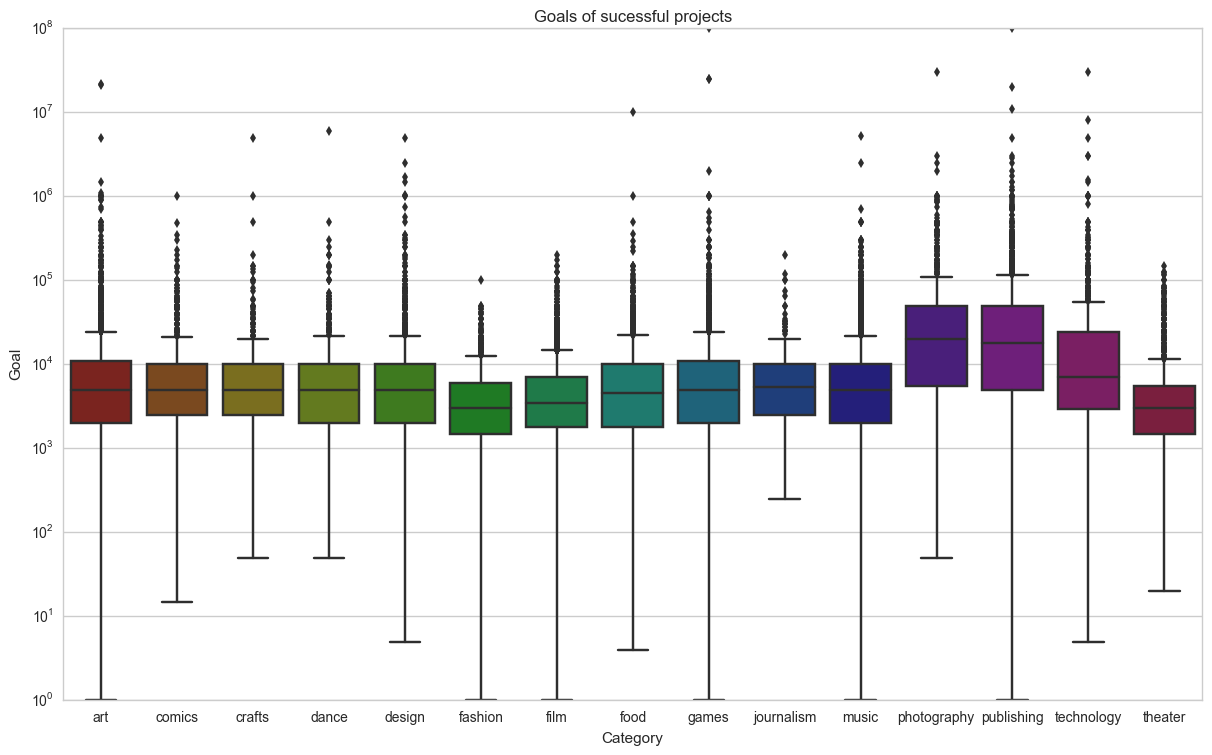

In [29]:
display(plt.gcf())